# Bài tập nhóm
# Nội dung
     1. Khảo sát bài toán
     2. Phân tích dữ liệu

## 1.  Khảo sát bài toán

Dữ liệu đang thiếu tên nhãn (cột) và nhóm em đã tìm thấy ở paper2 
Với các input variables were: pregnant,glucose, Blood,thickness, Insulin, Body Mass Index (BMI), diabetes, Age
Dựa vào 8 input trên thì ta ra được outcome với [0,1]


## 2.Phân tích bài toán

### Introduction

Exploratory Data Analysis of the pima-indians-diabetes
the features present in the dataset are:
    Pregnancies
    Glucose
    BloodPressure
    SkinThickness
    Insulin
    BMI
    DiabetesPedigreeFunction
    Age
Outcome


    


Exploratory Data Analysis of the pima-indians-diabetes dataset.

The features present in the dataset are:

    Pregnancies
    Glucose
    BloodPressure
    SkinThickness
    Insulin
    BMI
    DiabetesPedigreeFunction
    Age
The target "Outcome" has 2 classes namely '0','1'



initial EDA

How: using powerfull python moduls [numpy,matplotlib,pandas,sklearn,seaborn]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

### **Load the dataset**

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### **A first look and non-graphical EDA**

Phân tích kh đồ họa

In [5]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**What are the stats of the variables?**


In [ ]:
df.describe()
# thống kê mô tả. 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Are the classes (species) balanced?

In [12]:
df['Outcome'].value_counts()
#df['column'].value_counts(): Phân bố giá trị cho biến categorical (như Outcome).

Outcome
0    500
1    268
Name: count, dtype: int64

### Correlation Between Variables

In [13]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

### Graphical EDA

Let's start from where we reached for the non-graphical EDA


### Are the classes (species) balanced

Using pandas

<Axes: xlabel='Outcome'>

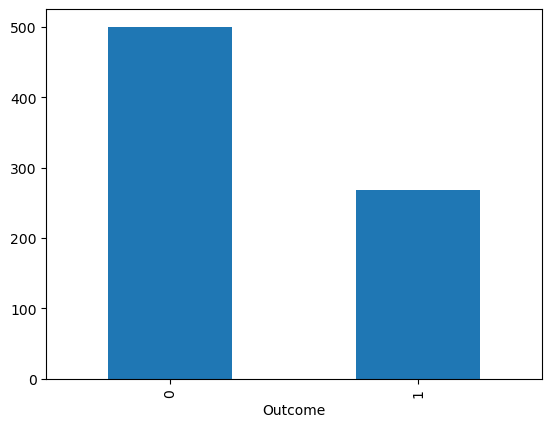

In [14]:
df['Outcome'].value_counts().plot.bar()
#Lấy cột Outcome từ DataFrame df (trong csv Outcome là biến categorical với các giá trị: 8 cái trên).
#Kết quả là một Series với index là các giá trị và giá trị là số lượng tương ứng.

Các lớp được cân bằng

Có thể yên tâm sử dụng các thước đo độ chính xác phân loại khác nhau

Không cần các bước tiền xử lý để giải quyết mất cân bằng dữ liệu (như tăng cường dữ liệu, oversampling, downsampling)

### Camparision graphs

 Scatterplot using pandas

<Axes: xlabel='Glucose', ylabel='BMI'>

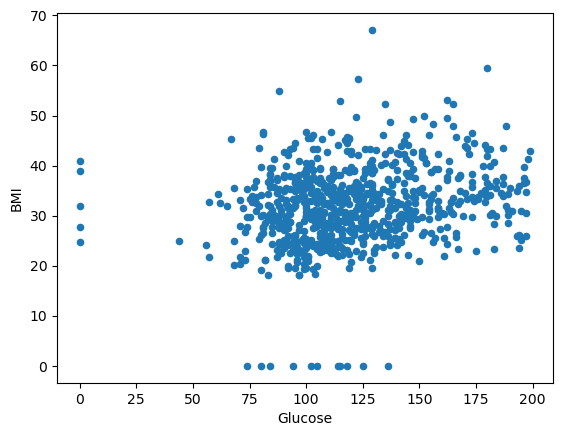

In [17]:
df.plot.scatter('Glucose','BMI')
#tương quan với out come lần lượt
# 0.466581 0.29269


## **Correlogram**

Correlogram: AKS correlation matrix, to analyse the relationship between each pair of numeric variables

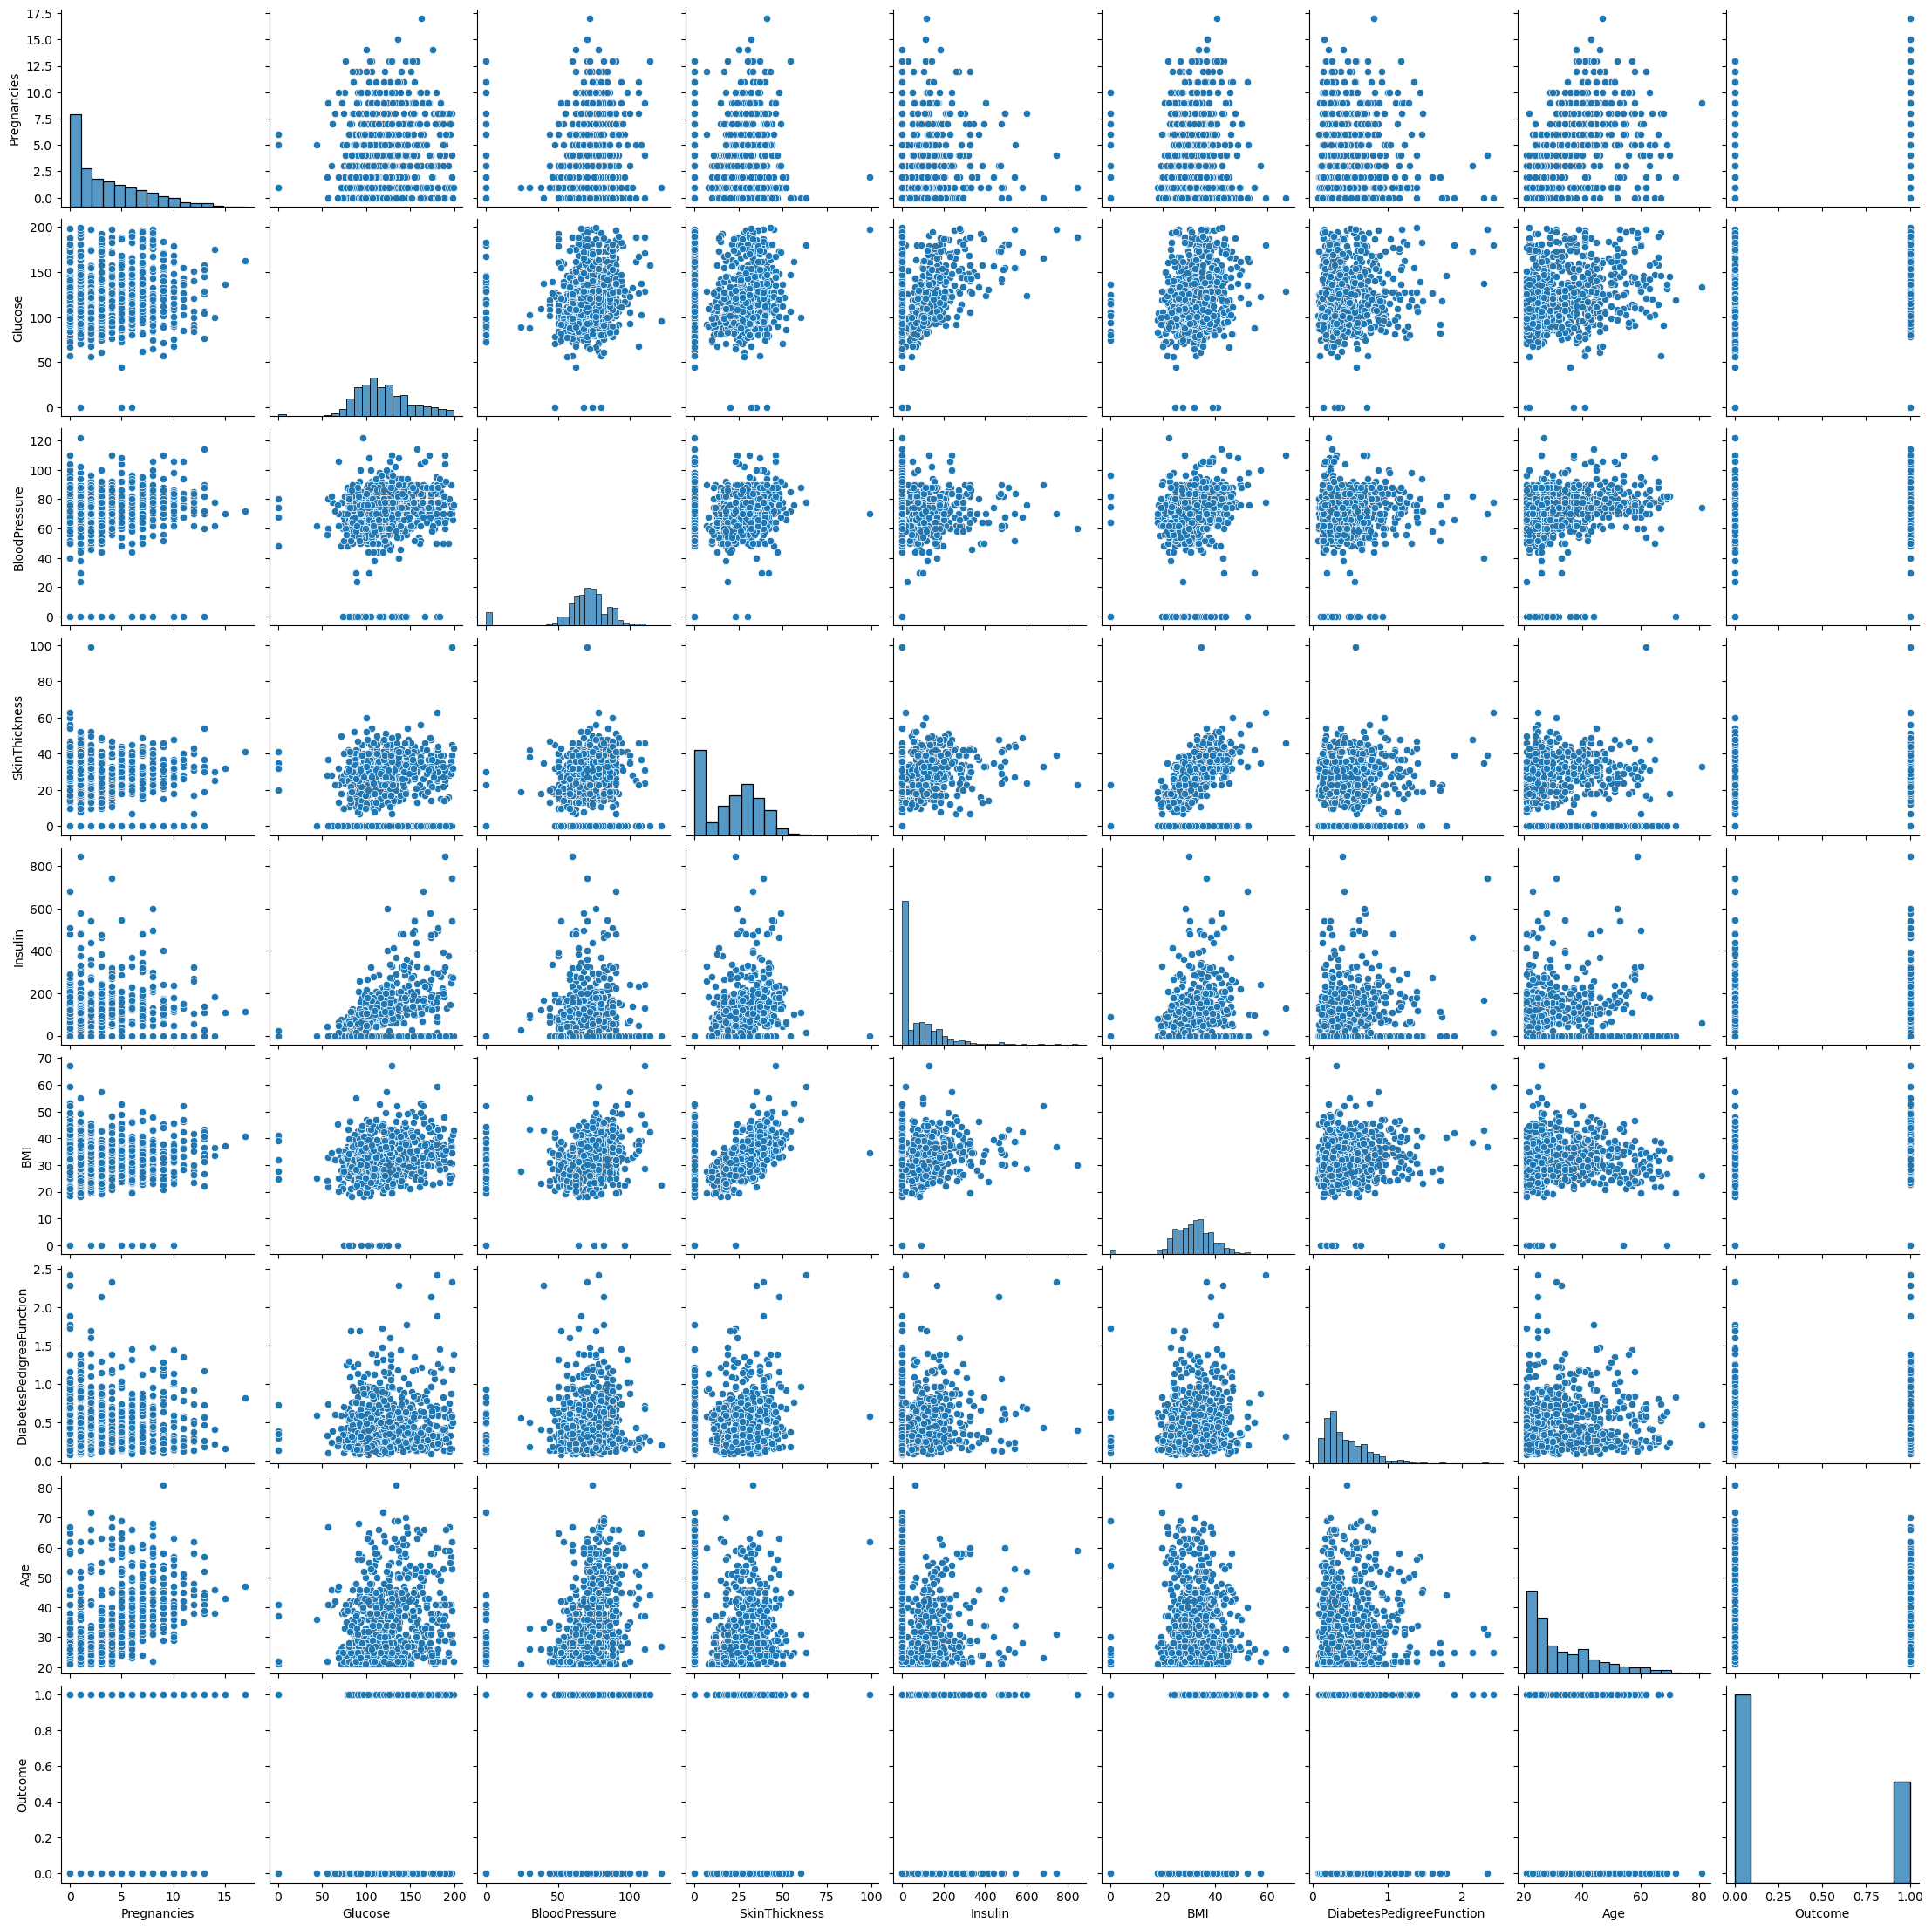

In [18]:
sns.pairplot(df)

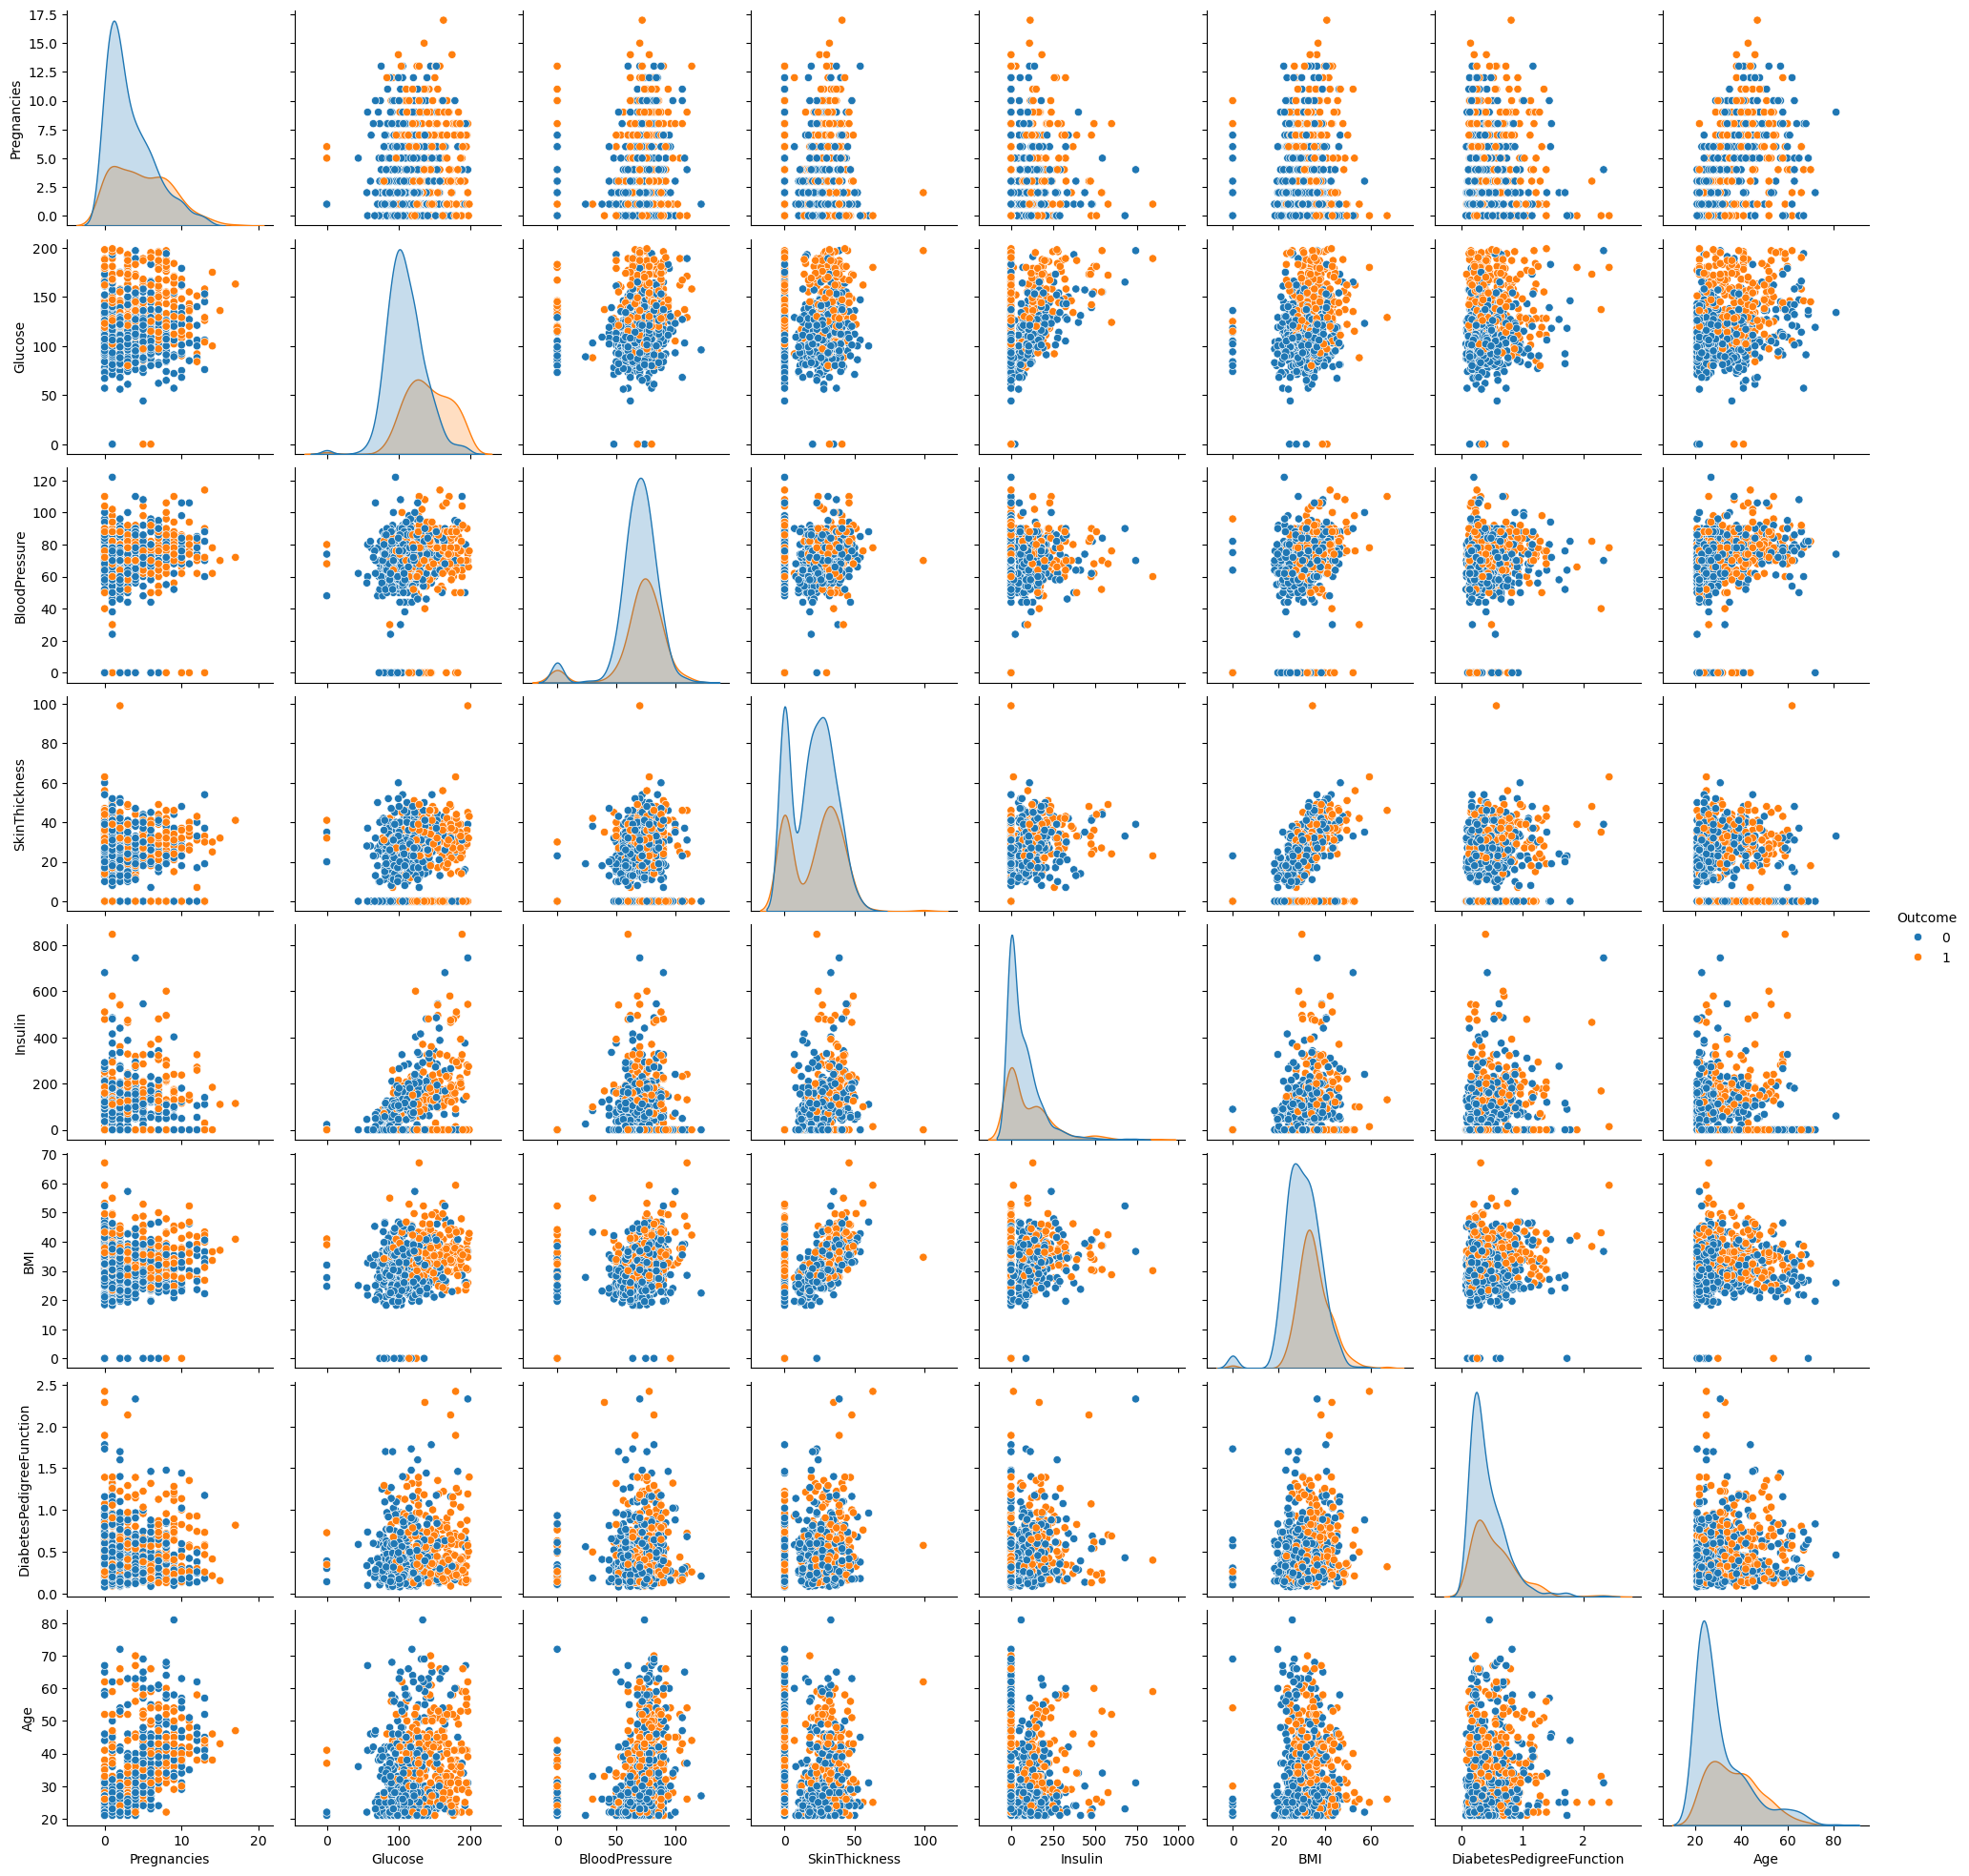

In [20]:
sns.pairplot(df,hue="Outcome")

### heatmap

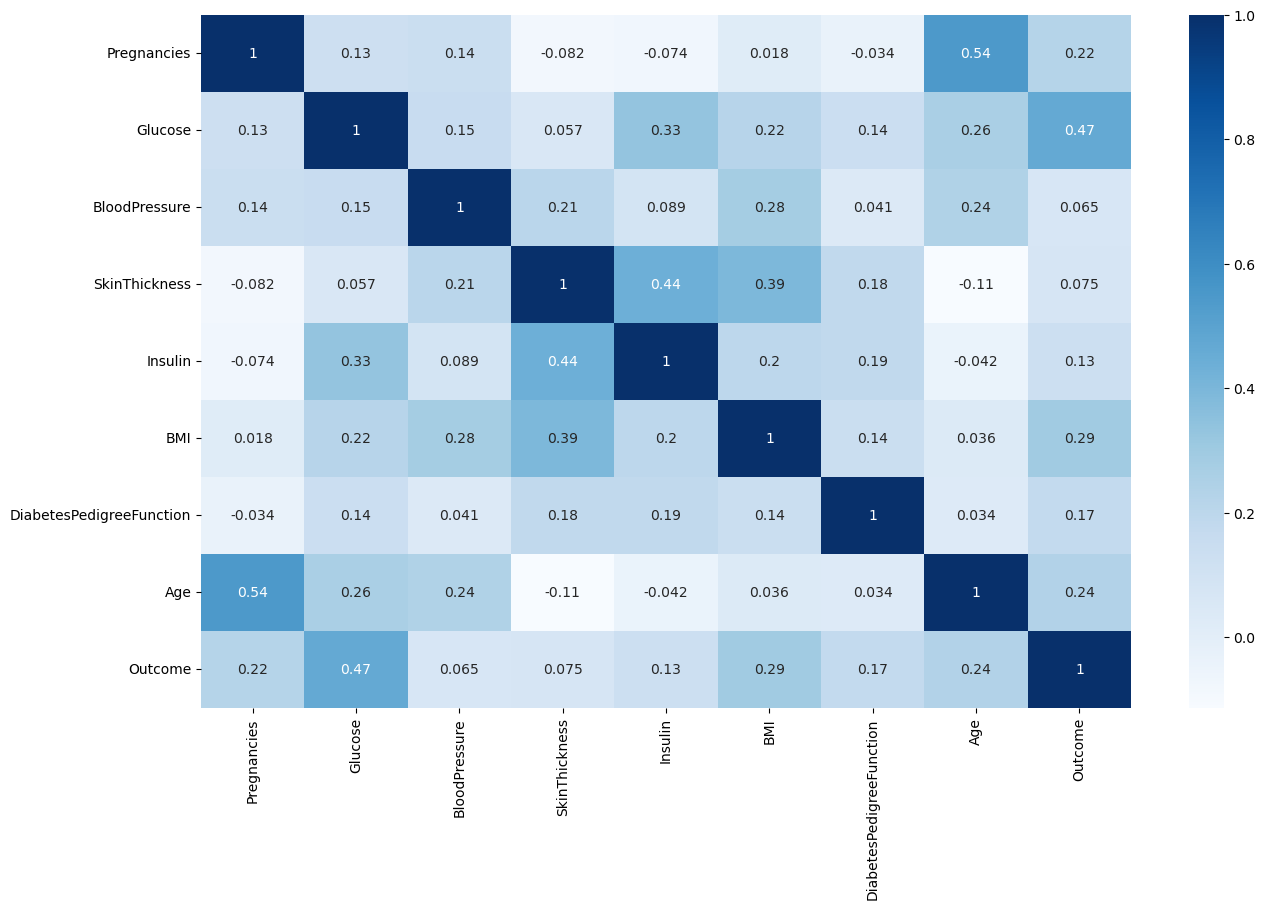

In [21]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

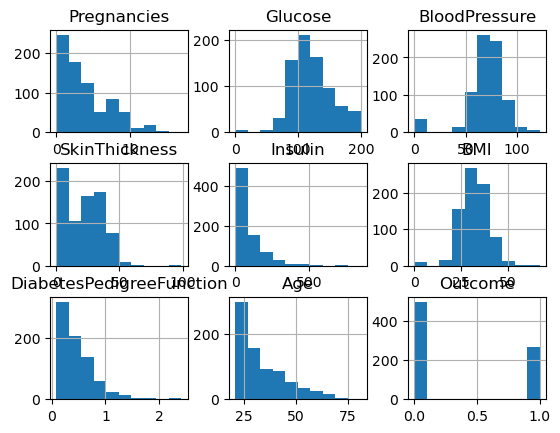

In [22]:
df.hist()

In [24]:


'''# Heatmap (tập trung Outcome)
fig = plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Heatmap (Focus on Outcome)')
plt.show()

# Scatter plot cho Glucose vs BMI, màu theo Outcome
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Scatter Plot: Glucose vs BMI by Outcome')
plt.show()

# Boxplot cho Glucose theo Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Boxplot: Glucose by Outcome')
plt.show()

# Pairplot (tất cả features với hue=Outcome)
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()
'''

"# Heatmap (tập trung Outcome)\nfig = plt.figure(figsize=(15,9))\nsns.heatmap(df.corr(), cmap='Blues', annot=True)\nplt.title('Correlation Heatmap (Focus on Outcome)')\nplt.show()\n\n# Scatter plot cho Glucose vs BMI, màu theo Outcome\nsns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)\nplt.title('Scatter Plot: Glucose vs BMI by Outcome')\nplt.show()\n\n# Boxplot cho Glucose theo Outcome\nsns.boxplot(x='Outcome', y='Glucose', data=df)\nplt.title('Boxplot: Glucose by Outcome')\nplt.show()\n\n# Pairplot (tất cả features với hue=Outcome)\nsns.pairplot(df, hue='Outcome', diag_kind='kde')\nplt.show()\n"

### + Xác định giá trị thiếu, và mẫu bất thường

In [33]:
print(df.isna().sum())  # Kiểm tra NaN
#ataset không có NaN gốc, nhưng điều này không có nghĩa dữ liệu sạch, vì giá trị 0 bất thường ở một số cột là vấn đề

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [34]:
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"Number of zeros in {col}: {(df[col] == 0).sum()}")

Number of zeros in Glucose: 5
Number of zeros in BloodPressure: 35
Number of zeros in SkinThickness: 227
Number of zeros in Insulin: 374
Number of zeros in BMI: 11


phương pháp 

Phân tích:

Insulin (374 zeros) và SkinThickness (227 zeros) có tỷ lệ 0 rất cao, ảnh hưởng nghiêm trọng đến phân tích đa biến (như tương quan với Outcome).

Glucose (5 zeros) và BMI (11 zeros) ít hơn, nhưng vẫn cần xử lý vì đây là các đặc trưng quan trọng (corr cao với Outcome).
BloodPressure (35 zeros) cũng cần xử lý, dù corr thấp (0.065).

In [30]:
data_copy = df.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

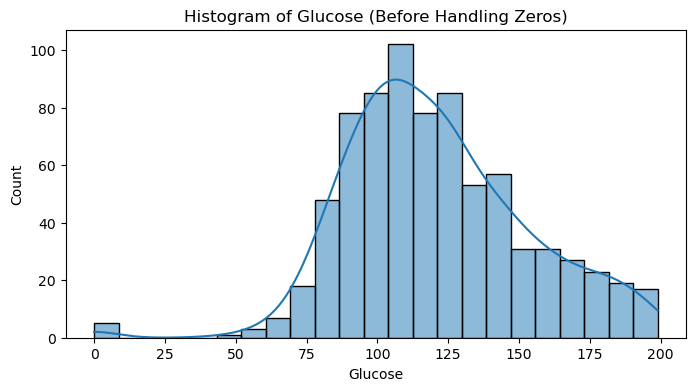

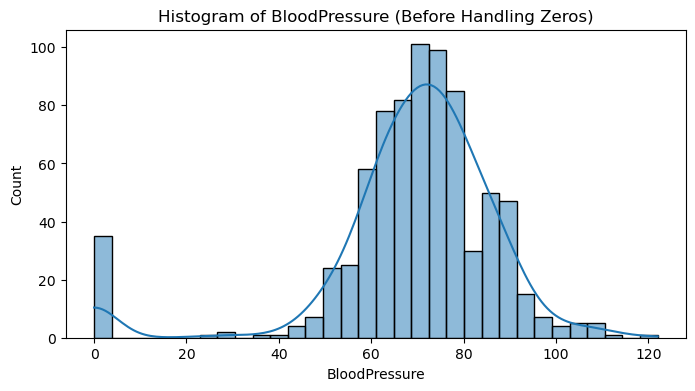

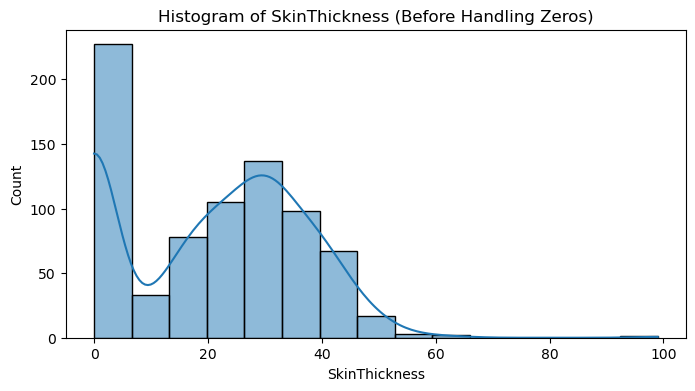

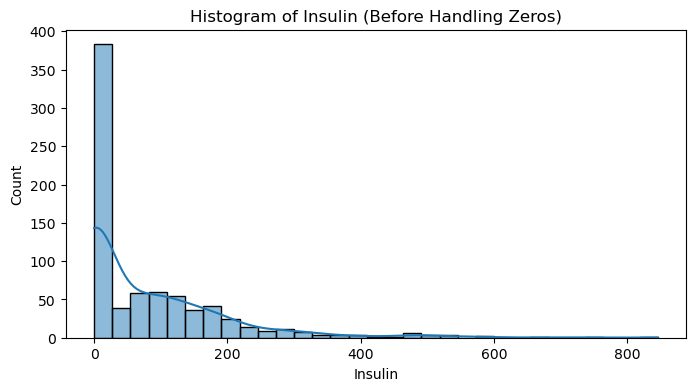

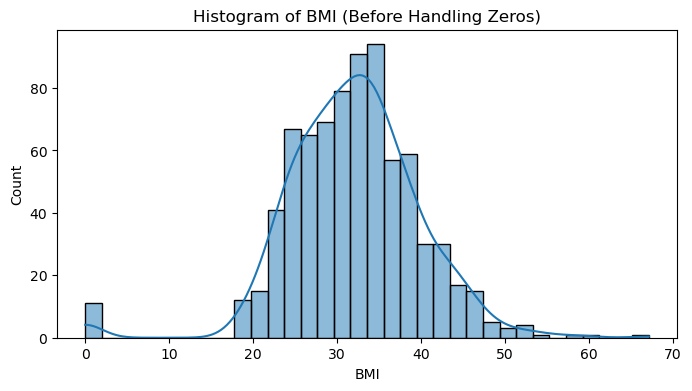

In [35]:
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col} (Before Handling Zeros)')
    plt.show()

### Xử lý giá trị thiếu ngầm:

In [36]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)
print(df.isna().sum())  # Kiểm tra lại

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### xác định mẫu bất thường

Mẫu bất thường (outliers): Là các giá trị nằm xa đáng kể so với phần lớn dữ liệu trong một cột, ví dụ Insulin=846 trong khi mean ~155.94 (sau xử lý 0). Outliers có thể làm sai lệch phân tích đa biến (như tương quan, scatter plot) và ảnh hưởng đến hiệu suất mô hình như LightGBM.

IQR (Interquartile Range) là một phương pháp thống kê phổ biến để phát hiện outliers, dựa trên phân bố của dữ liệu mà không giả định dữ liệu có phân bố chuẩn (normal distribution).

IQR đo lường độ phân tán của 50% dữ liệu ở giữa (từ Q1 đến Q3).
Outliers là các giá trị nằm ngoài khoảng [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
Hệ số 1.5 là chuẩn thông dụng, dựa trên quy tắc Tukey, tương ứng với khoảng 99.7% dữ liệu trong phân bố chuẩn, nhưng vẫn hiệu quả với dữ liệu lệch.

In [37]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

for col in df.columns[:-1]:  # Bỏ Outcome
    num_outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {num_outliers} outliers, lower bound={lower:.2f}, upper bound={upper:.2f}")

Pregnancies: 4 outliers, lower bound=-6.50, upper bound=13.50
Glucose: 0 outliers, lower bound=39.00, upper bound=201.00
BloodPressure: 14 outliers, lower bound=40.00, upper bound=104.00
SkinThickness: 87 outliers, lower bound=14.50, upper bound=42.50
Insulin: 164 outliers, lower bound=70.43, upper bound=206.62
BMI: 8 outliers, lower bound=13.85, upper bound=50.25
DiabetesPedigreeFunction: 29 outliers, lower bound=-0.33, upper bound=1.20
Age: 9 outliers, lower bound=-1.50, upper bound=66.50


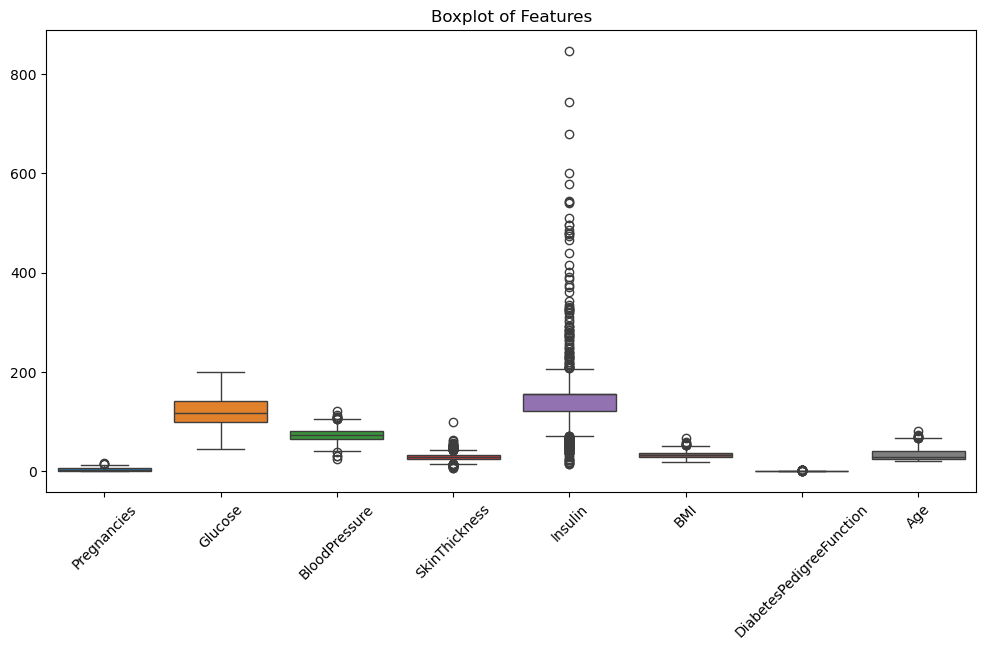

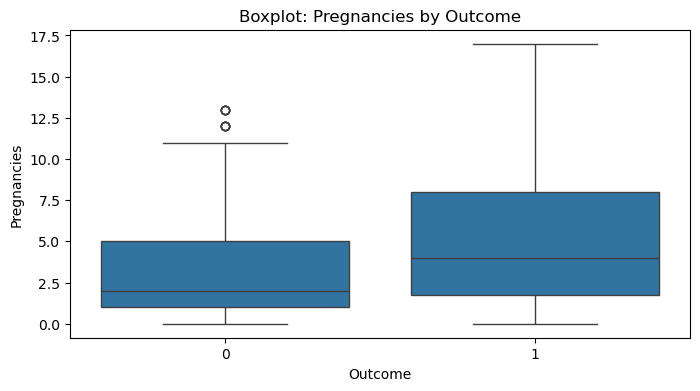

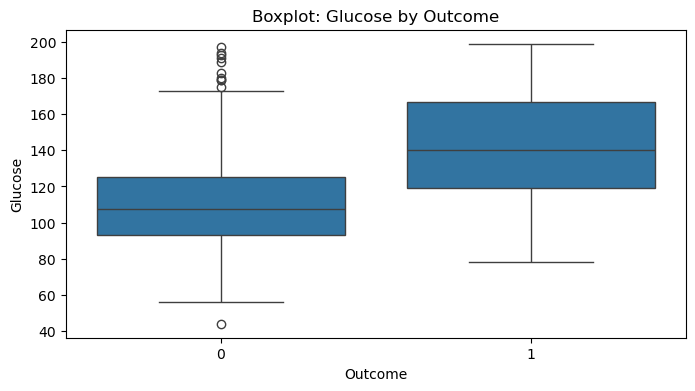

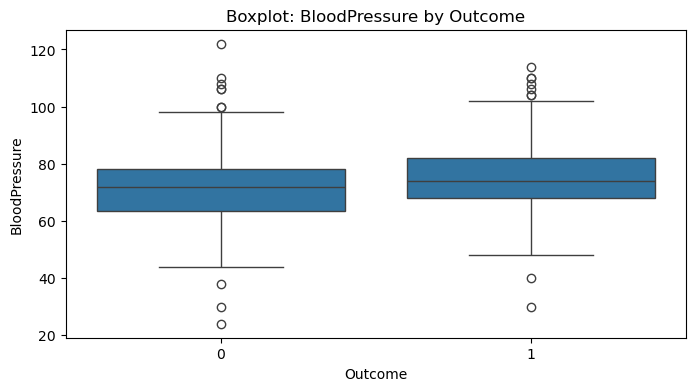

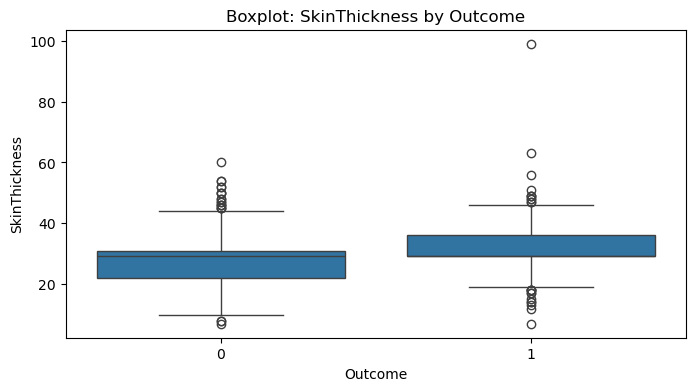

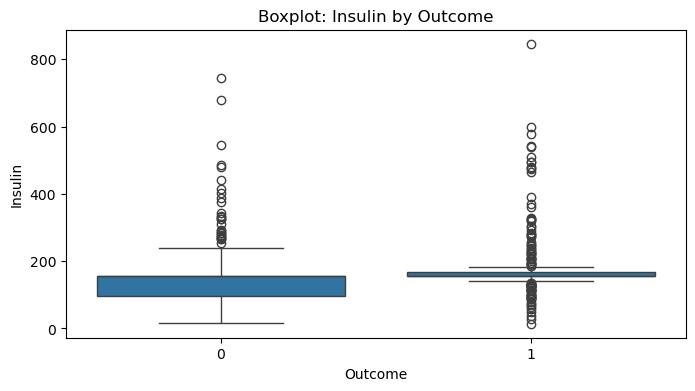

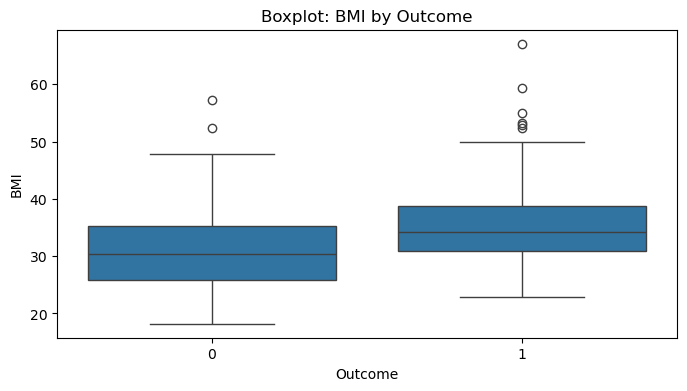

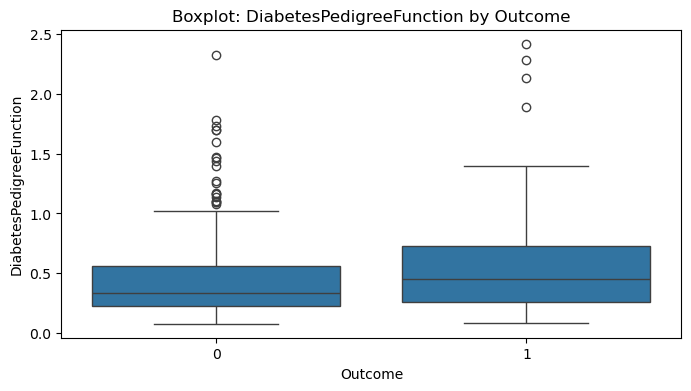

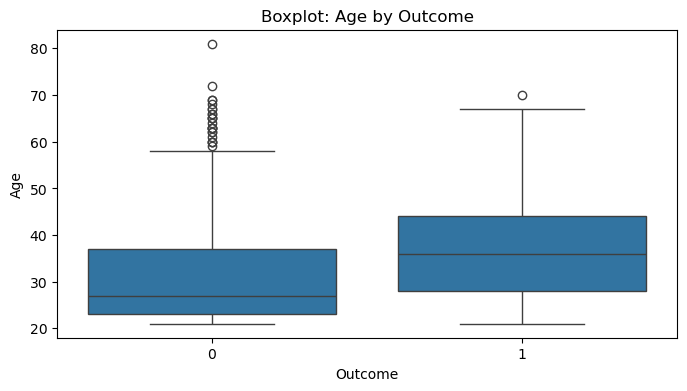

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

# Boxplot theo Outcome
for col in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Boxplot: {col} by Outcome')
    plt.show()

In [ ]:

data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1586746561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1586746561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Giả sử df đã replace 0 bằng NaN
data_copy_MICE = df.copy(deep=True)
cols_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data_copy_MICE[cols_missing] = data_copy_MICE[cols_missing].replace(0, np.nan)

# Tạo MICE imputer
imp = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)

# Chỉ áp dụng cho các cột numeric
data_copy_MICE[cols_missing] = imp.fit_transform(data_copy_MICE[cols_missing])

print(data_copy_MICE.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0         35.000  404.235687  33.6   
1            1     85.0           66.0         29.000  101.785577  26.6   
2            8    183.0           64.0         20.114  242.983223  23.3   
3            1     89.0           66.0         23.000   94.000000  28.1   
4            0    137.0           40.0         35.000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


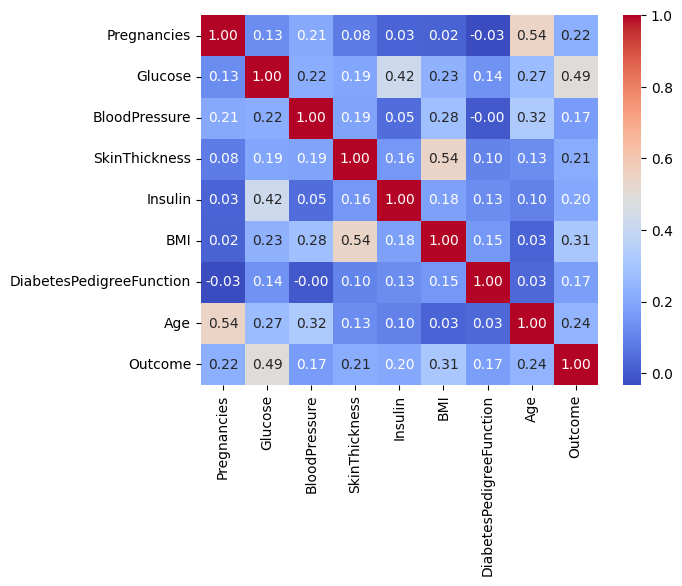

In [22]:
temp = data_copy.select_dtypes(include=[np.number])

corr = temp.corr()
plt.Figure(dpi=30)
sns.heatmap(corr,annot=True,fmt='.2f', cmap='coolwarm')
plt.show()

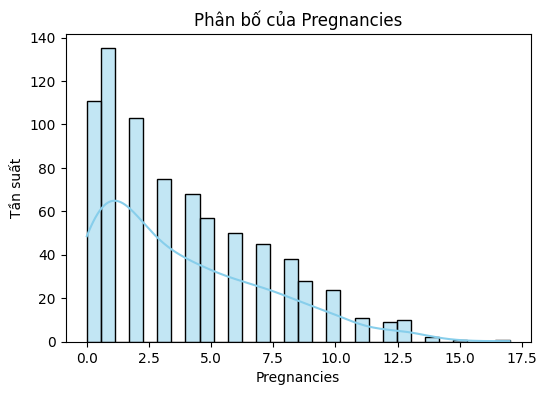

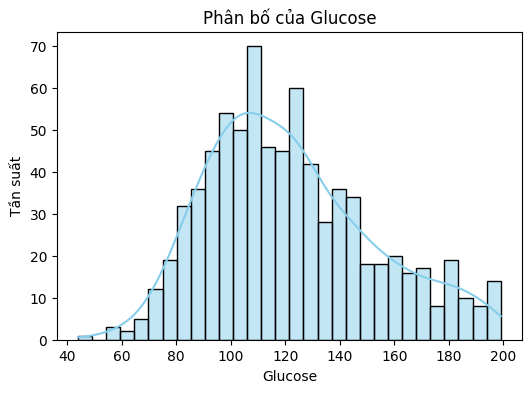

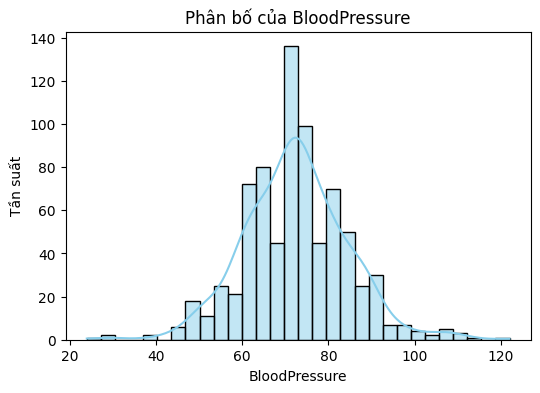

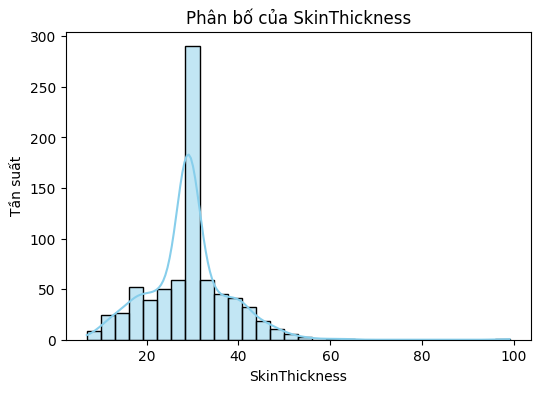

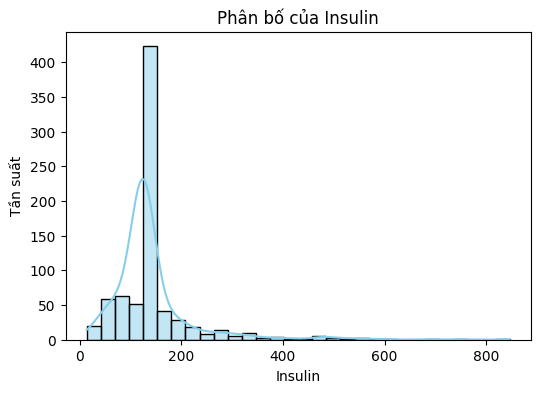

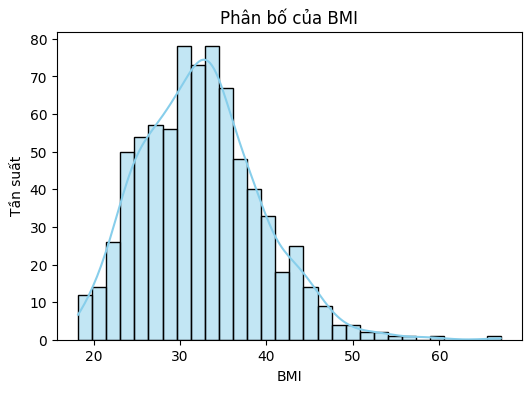

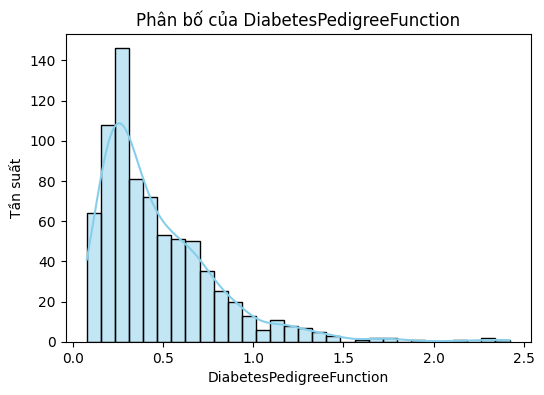

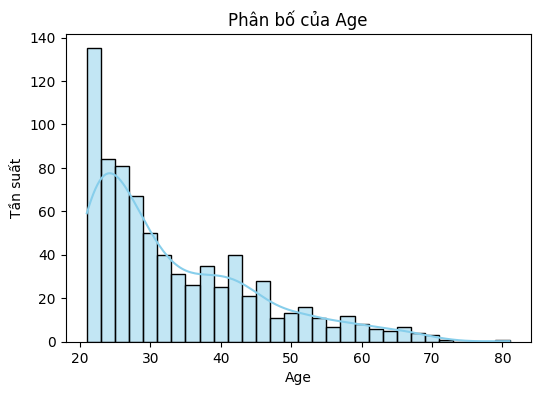

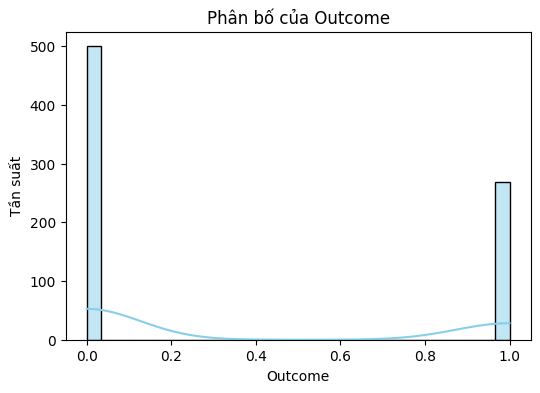

In [21]:
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()

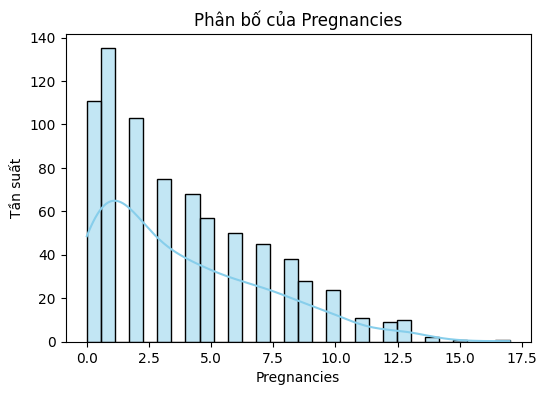

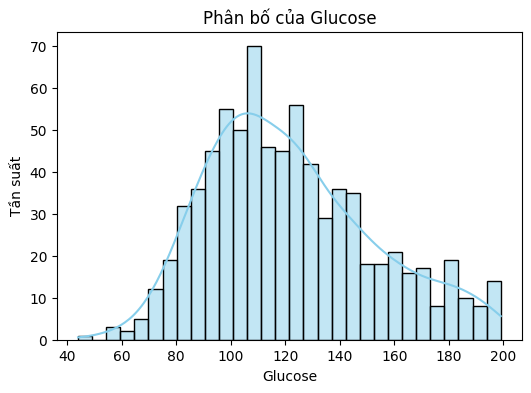

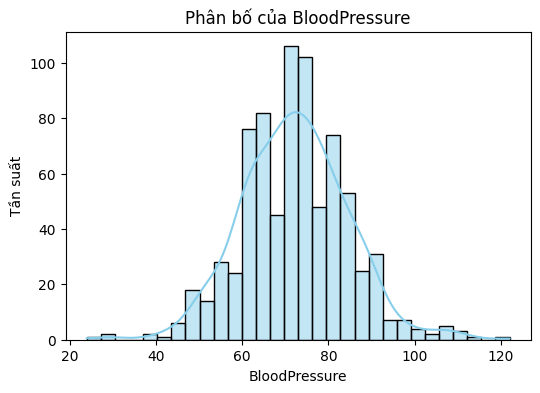

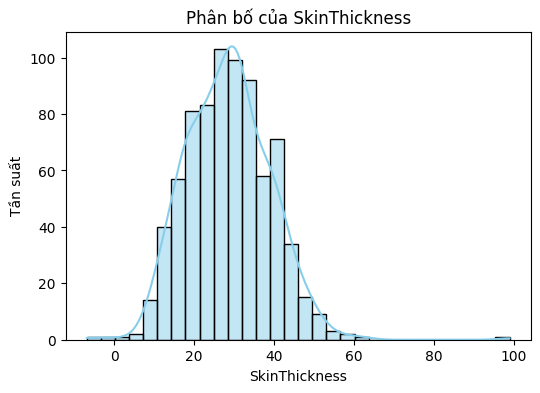

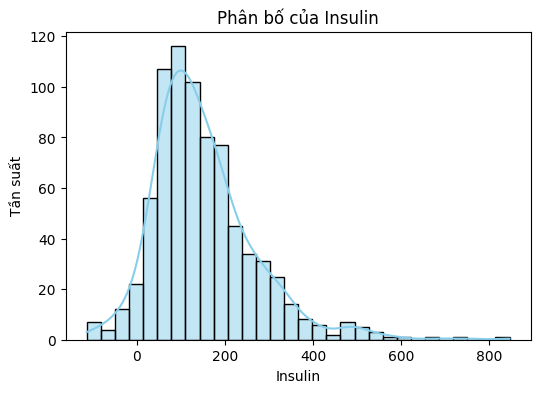

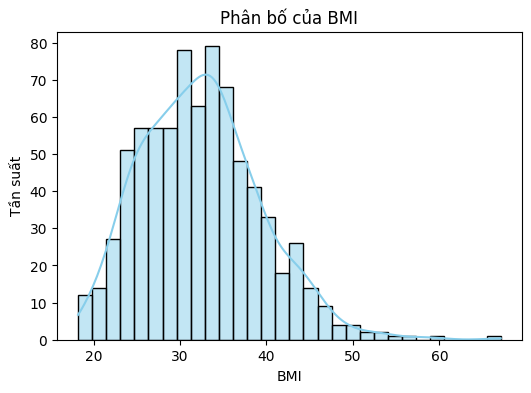

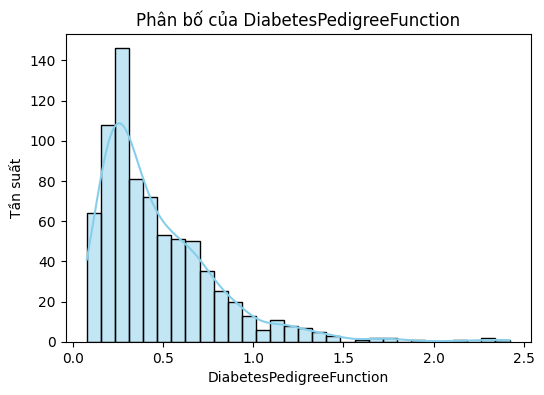

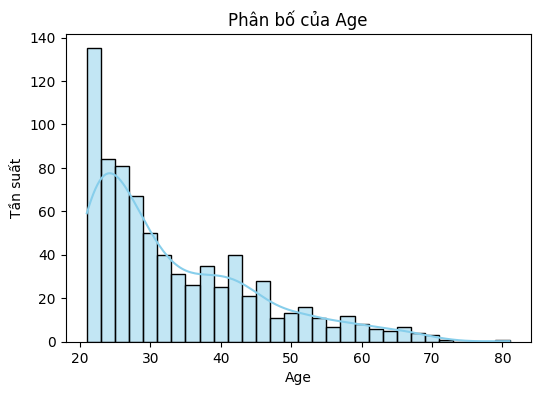

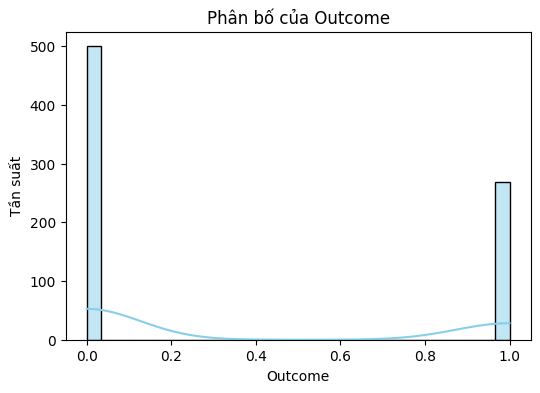

In [32]:
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy_MICE[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


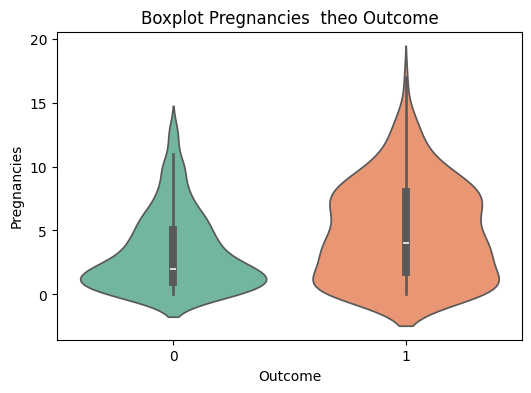

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


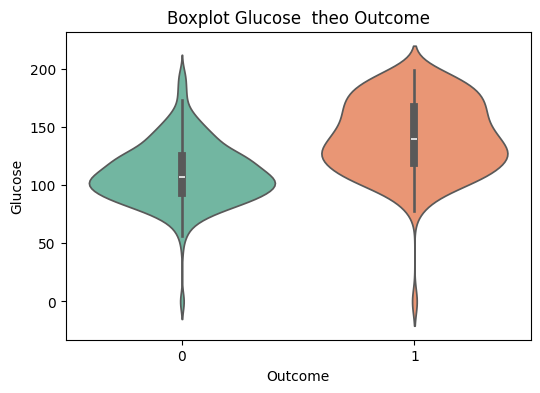

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


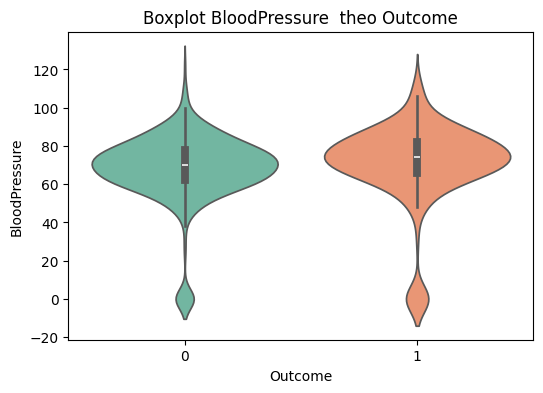

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


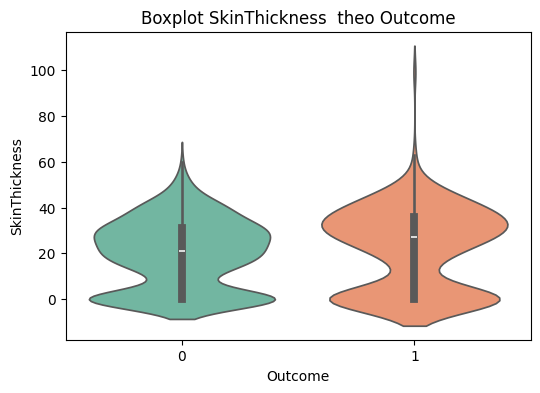

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


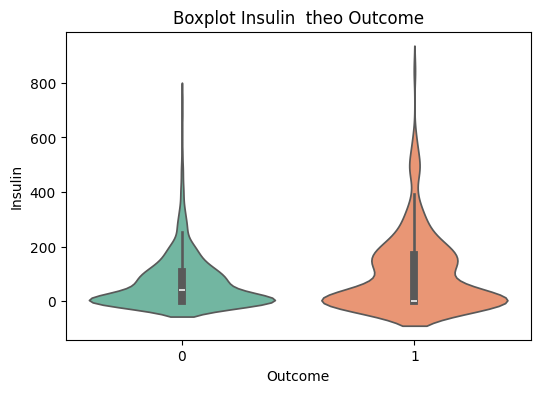

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


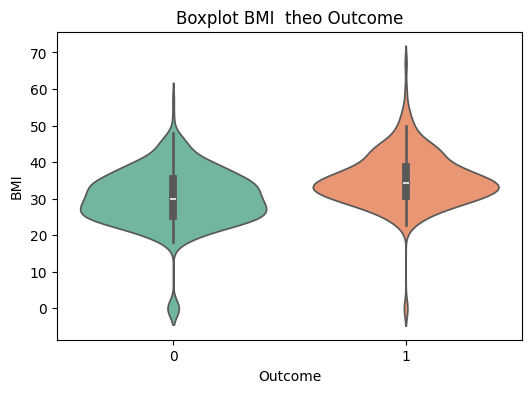

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


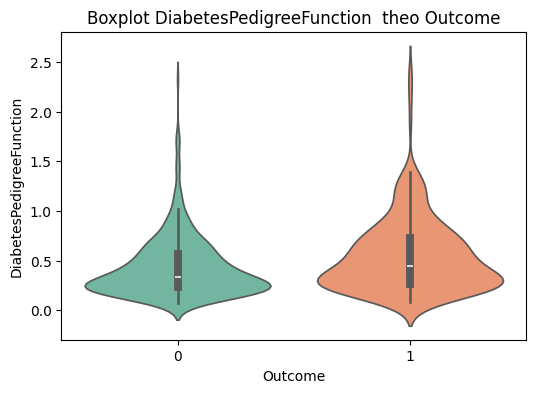

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


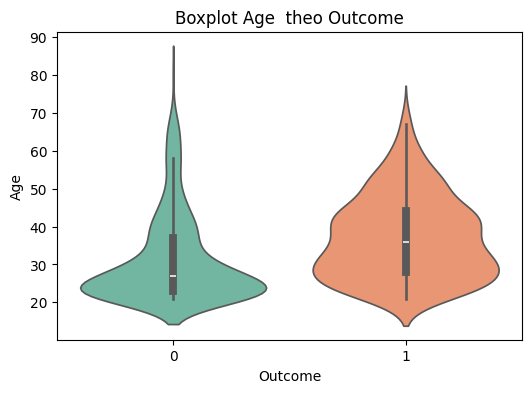

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


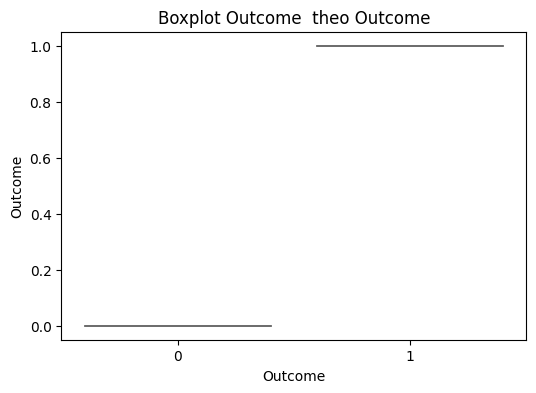

In [33]:
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


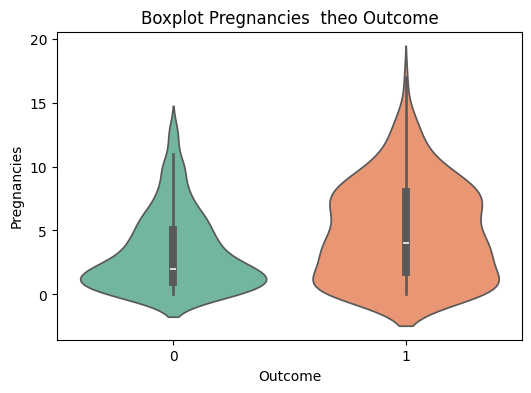

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


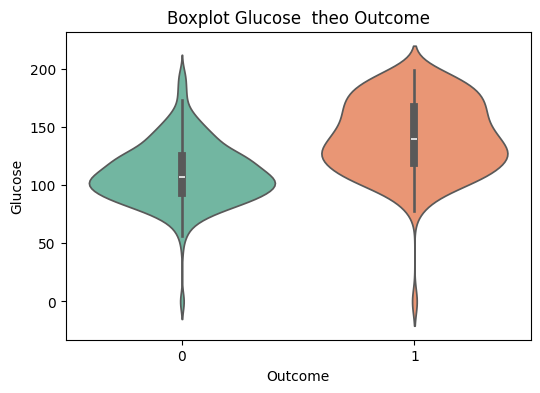

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


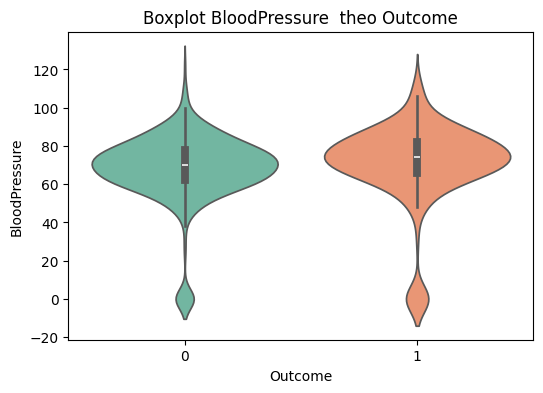

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


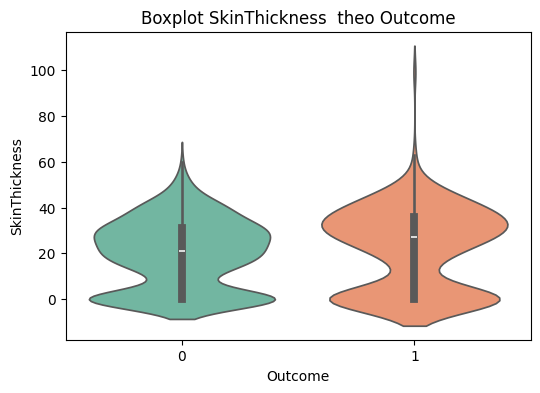

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


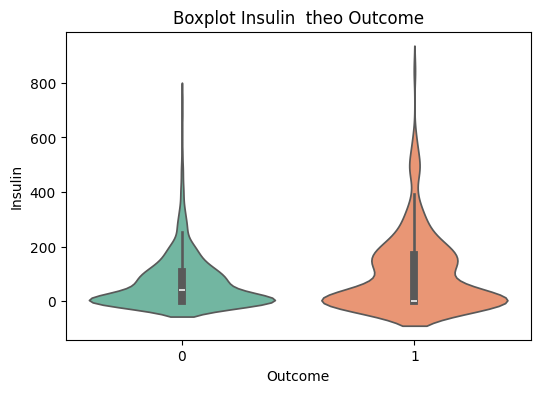

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


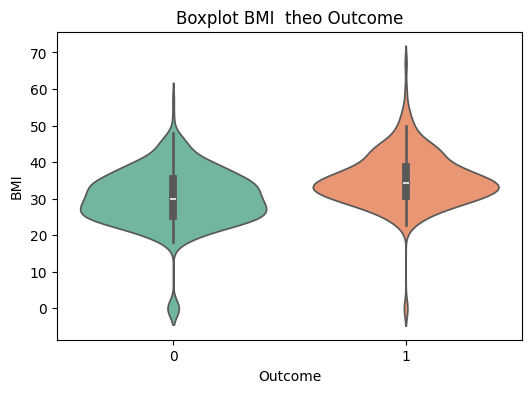

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


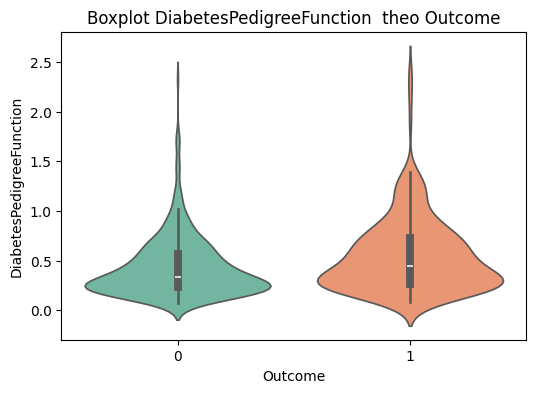

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


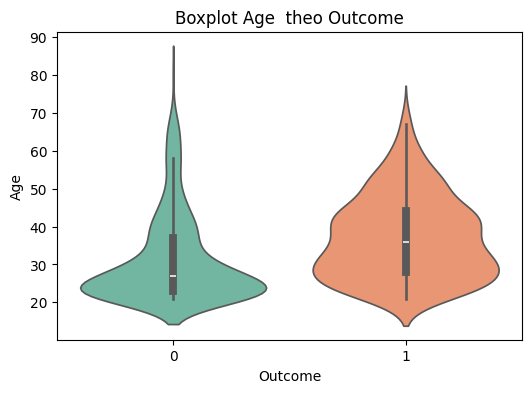

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


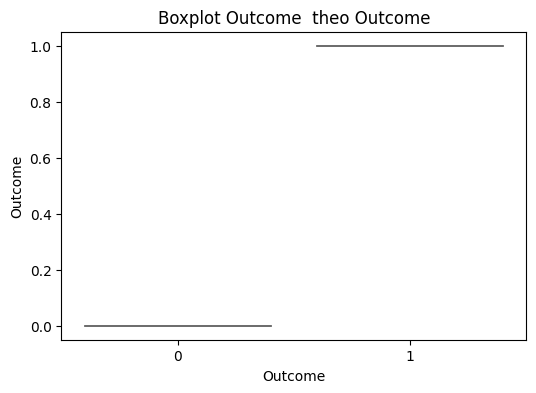

In [35]:
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()

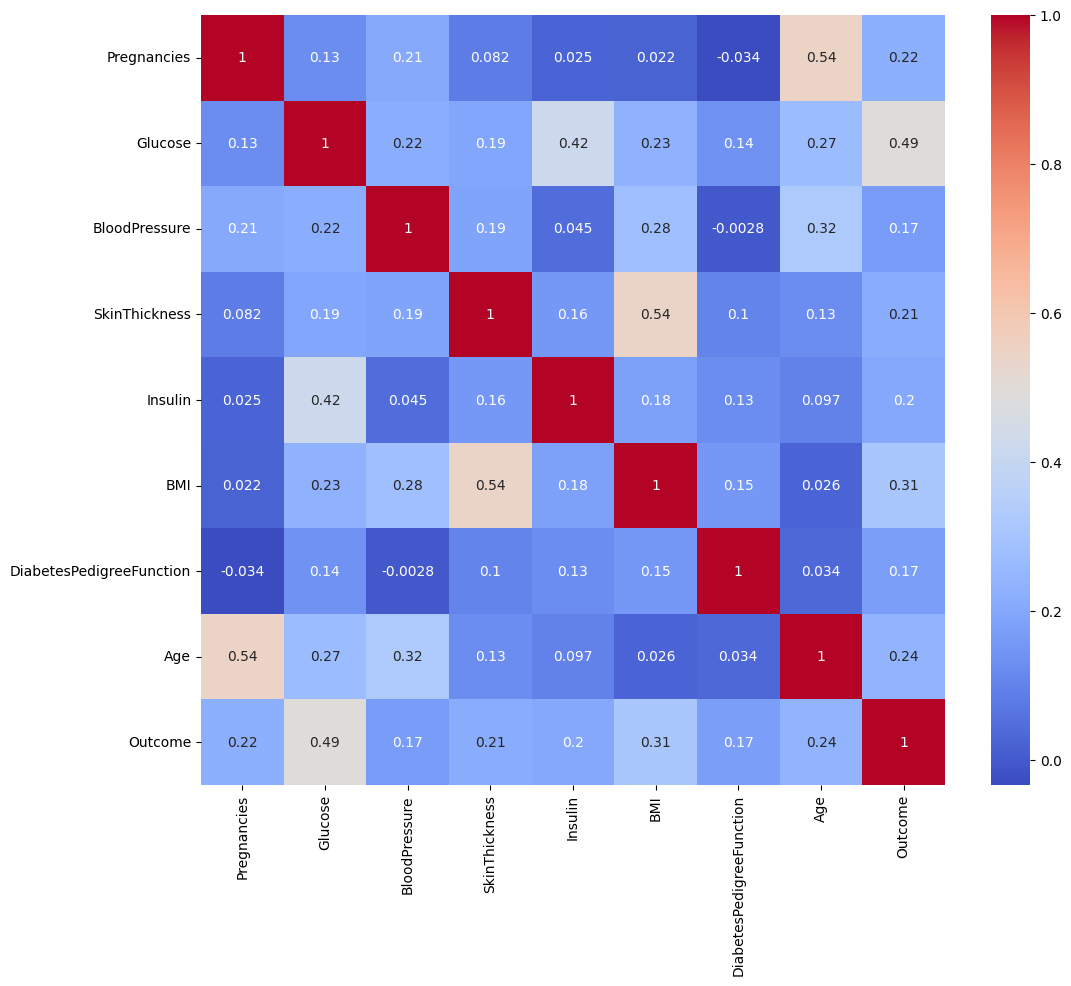

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='coolwarm')

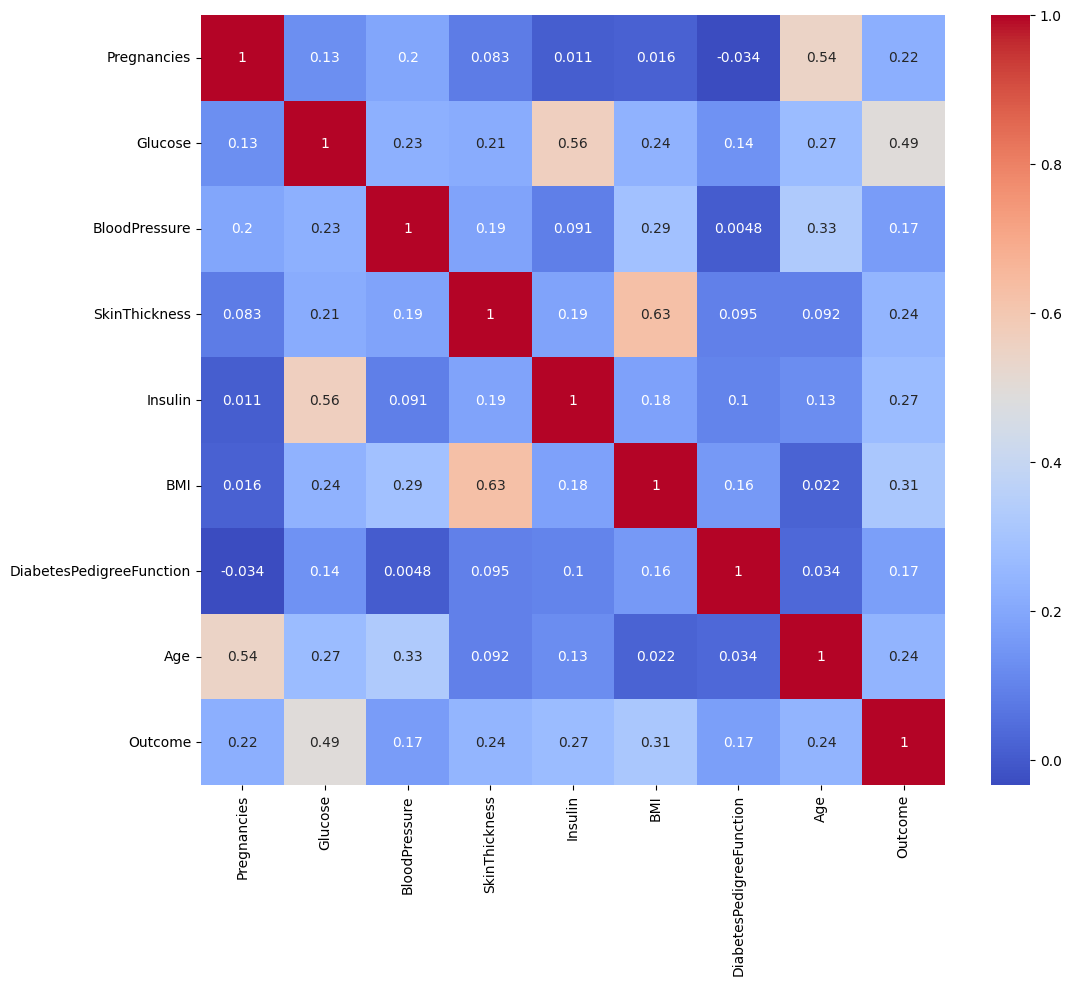

In [38]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_copy_MICE.corr(), annot=True,cmap ='coolwarm')

In [40]:
from sklearn.model_selection import train_test_split

X = data_copy.drop('Outcome', axis=1)
y = data_copy['Outcome']

X_MIKE = data_copy_MICE.drop('Outcome', axis=1)
y_MIKE = data_copy_MICE['Outcome']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train_MIKE, X_val_MIKE, y_train_MIKE, y_val_MIKE = train_test_split(
    X_MIKE, y_MIKE, test_size=0.2, random_state=42, stratify=y
)



In [42]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)


y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [43]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
model.fit(X_train_MIKE, y_train_MIKE)

y_val_pred = model.predict(X_val_MIKE)


y_pred = model.predict(X_val_MIKE)
y_prob = model.predict_proba(X_val_MIKE)[:,1]

acc = accuracy_score(y_val_MIKE, y_pred)
f1 = f1_score(y_val_MIKE, y_pred)
roc_auc = roc_auc_score(y_val_MIKE, y_prob)


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi